<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Machine Learning Foundation

## Course 5, Part b: Intro to Neural Networks LAB


## Exercise: neurons as logic gates
In this exercise we will experiment with neuron computations.  We will show how to represent basic logic functions like AND, OR, and XOR using single neurons (or more complicated structures).  Finally, at the end we will walk through how to represent neural networks as a chain of matrix computations.


In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt

### Sigmoid function:

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$


In [2]:
## Quickly define the sigmoid function
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

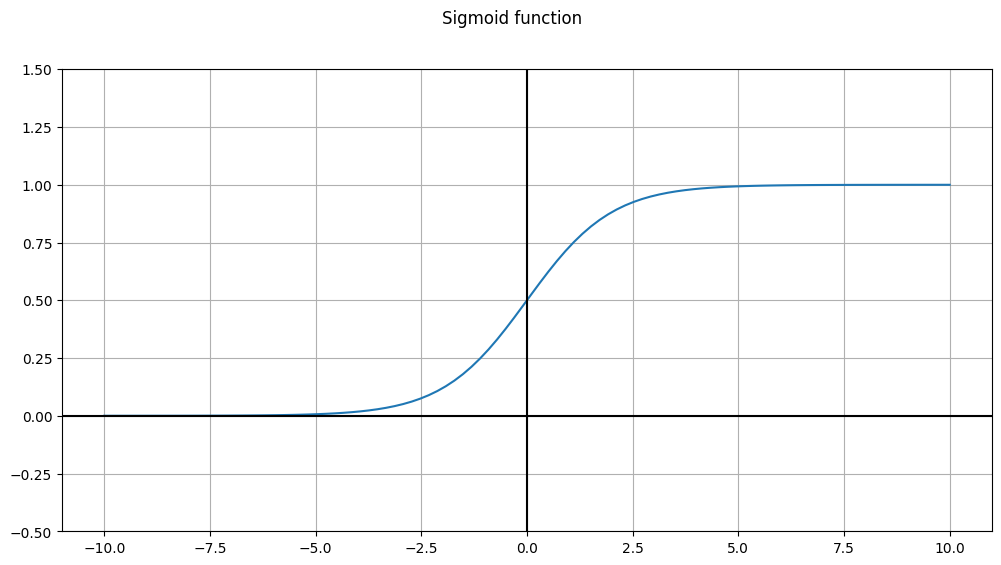

In [3]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

### Thinking of neurons as boolean logic gates

A logic gate takes in two boolean (true/false or 1/0) inputs, and returns either a 0 or 1 depending on its rule. The truth table for a logic gate shows the outputs for each combination of inputs, (0, 0), (0, 1), (1,0), and (1, 1). For example, let's look at the truth table for an "OR" gate:

### OR Gate

<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values. Imagine a neuron that takes in two inputs, $x_1$ and $x_2$, and a bias term:

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L1/data/logic01.png)

By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights (represented by ? marks above), such that it returns an output close to 0 or 1 depending on the inputs.

What numbers for the weights would we need to fill in for this gate to output OR logic? Observe from the plot above that $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for (0, 0) to be close to zero, $b$ should be negative (at least -10)
* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10.
* Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be? 
    * At least +20
* So let's try out $w_1=20$, $w_2=20$, and $b=-10$!

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L1/data/logic02.png)


In [4]:
def logic_gate(w1, w2, b):
    # Helper to create logic gate functions
    # Plug in values for weight_a, weight_b, and bias
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    # Helper function to test out our weight functions.
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [5]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

This matches! Great! Now you try finding the appropriate weight values for each truth table. Try not to guess and check- think through it logically and try to derive values that work.

### AND Gate

<table>

<tr>
<th colspan="3">AND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>


## Exercise 1
Determine what values for the neurons would make this function as an AND gate.


In [6]:
# TO DO: Fill in the w1, w2, and b parameters such that
# the truth table matches
### BEGIN SOLUTION
w1 = 11
w2 = 10
b = -20
and_gate = logic_gate(w1, w2, b)
### END SOLUTION
test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


## Exercise 2
Do the same for the NOR gate and the NAND gate.


### NOR (Not Or) Gate

<table>

<tr>
<th colspan="3">NOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>


In [7]:
# TO DO: Fill in the w1, w2, and b parameters such that the
# truth table matches
### BEGIN SOLUTION
w1 = -20
w2 = -20
b = 10
nor_gate = logic_gate(w1, w2, b)
### END SOLUTION

test(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


### NAND (Not And) Gate

<table>

<tr>
<th colspan="3">NAND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>


In [8]:
### BEGIN SOLUTION
# TO DO: Fill in the w1, w2, and b parameters such that the
# truth table matches
w1 = -11
w2 = -10
b = 20
nand_gate = logic_gate(w1, w2, b)
### END SOLUTION

test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## The limits of single neurons

If you've taken computer science courses, you may know that the XOR gates are the basis of computation. They can be used as so-called "half-adders", the foundation of being able to add numbers together. Here's the truth table for XOR:

### XOR (Exclusive Or) Gate

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

Can we create a set of weights such that a single neuron can output this property?

It turns out we cannot, since single neurons can't correlate inputs. Can we still use neurons to somehow form an XOR gate?

What if we tried something more complex:

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L1/data/logic03.png)

Here, we've got the inputs going to two separate gates: the top neuron is an OR gate, and the bottom is a NAND gate. The output of these gates then get passed to another neuron, which is an AND gate. If you work out the outputs at each combination of input values, you'll see that this is an XOR gate.


In [9]:
# Make sure we have or_gate, nand_gate, and and_gate working from above!
def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)
test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Feedforward Networks as Matrix Computations

We discussed previously how the feed-forward computation of a neural network can be thought of as matrix calculations and activation functions.  We will do some actual computations with matrices to see this in action.

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L1/data/FF_NN.png)


## Exercise 3
Provided below are the following:

- Three weight matrices `W_1`, `W_2` and `W_3` representing the weights in each layer.  The convention for these matrices is that each $W_{i,j}$ gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer.  
- A vector `x_in` representing a single input and a matrix `x_mat_in` representing 7 different inputs.
- Two functions: `soft_max_vec` and `soft_max_mat` which apply the soft_max function to a single vector, and row-wise to a matrix.

The goals for this exercise are:
1. For input `x_in` calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.
2. Write a function that does the entire neural network calculation for a single input
3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.
4. Test your functions on `x_in` and `x_mat_in`.

This illustrates what happens in a NN during one single forward pass. Roughly speaking, after this forward pass, it remains to compare the output of the network to the known truth values, compute the gradient of the loss function and adjust the weight matrices `W_1`, `W_2` and `W_3` accordingly, and iterate. Hopefully this process will result in better weight matrices and our loss will be smaller afterwards.


In [10]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])
x_in = np.array([.5,.8,.2])
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],
                     [.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])

def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

print('the matrix W_1\n')
print(W_1)
print('-'*30)
print('vector input x_in\n')
print(x_in)
print ('-'*30)
print('matrix input x_mat_in -- starts with the vector `x_in`\n')
print(x_mat_in)

the matrix W_1

[[ 2 -1  1  4]
 [-1  2 -3  1]
 [ 3 -2 -1  5]]
------------------------------
vector input x_in

[0.5 0.8 0.2]
------------------------------
matrix input x_mat_in -- starts with the vector `x_in`

[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]


In [11]:
### BEGIN SOLUTION
z_2 = np.dot(x_in,W_1)
z_2

array([ 0.8,  0.7, -2.1,  3.8])

In [12]:
a_2 = sigmoid(z_2)
a_2

array([0.68997448, 0.66818777, 0.10909682, 0.97811873])

In [13]:
z_3 = np.dot(a_2,W_2)
z_3

array([ 3.55880727,  4.01355384,  0.48455118, -1.55014198])

In [14]:
a_3 = sigmoid(z_3)
a_3

array([0.97231549, 0.98225163, 0.61882199, 0.17506576])

In [15]:
z_4 = np.dot(a_3,W_3)
z_4

array([ 2.04146788,  1.04718238, -3.47867612])

In [16]:
y_out = soft_max_vec(z_4)
y_out
### END SOLUTION

array([0.72780576, 0.26927918, 0.00291506])

In [17]:
## A one-line function to do the entire neural net computation

def nn_comp_vec(x):
    return soft_max_vec(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [18]:
nn_comp_vec(x_in)

array([0.72780576, 0.26927918, 0.00291506])

In [19]:
nn_comp_mat(x_mat_in)

array([[0.72780576, 0.26927918, 0.00291506],
       [0.62054212, 0.37682531, 0.00263257],
       [0.69267581, 0.30361576, 0.00370844],
       [0.36618794, 0.63016955, 0.00364252],
       [0.57199769, 0.4251982 , 0.00280411],
       [0.38373781, 0.61163804, 0.00462415],
       [0.52510443, 0.4725011 , 0.00239447]])

## Example: Digit Recognition with Multi-layer Perceptron

In this example, you will implement a simple neural network using scikit-learn's **MLPClassifier** function. The goal is to correctly identify digits from a dataset of tens of thousands of handwritten images from [kaggle](https://www.kaggle.com/code/cezaryszulc/sklearn-simple-neural-network/notebook?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01).

A multilayer perceptron (MLP) is a fully connected class of feedforward artificial neural network (ANN). An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called [backpropagation](https://en.wikipedia.org/wiki/Backpropagation?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01) for training. Its multiple layers and non-linear activation allow it to distinguish data that is not linearly separable.

Let's download the digits dataset and display a few images!


In [20]:
import skillsnetwork
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L1/data/digits.csv",
                           overwrite=True)

Saved to '.'


In [21]:
import pandas as pd
digits = pd.read_csv("digits.csv")

labels = digits['label']
digits = np.array(digits.drop('label', axis=1)).astype('float')
digits.shape, labels.shape

((42000, 784), (42000,))

There are 42000 digit images and each has 784 pixels, which means we can reshape them into $28\times28$ images for displaying.


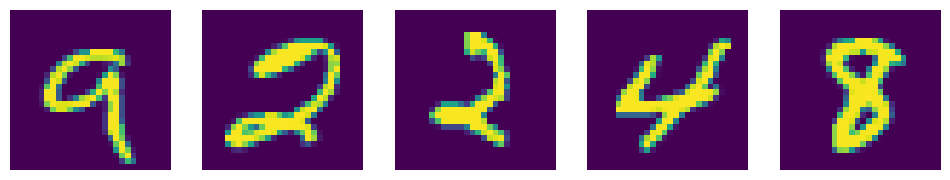

In [22]:
import random
plt.figure(figsize=(12,4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(random.choice(digits).reshape(28,28))
    plt.axis("off")

Let's split the 42000 images into train and test set.


In [23]:
split = 0.7, 0.3 # train, test
# normalize data
digits /= 255.0

split_ind = int(len(digits)*split[0])
X_train, X_test, y_train, y_test = digits[:split_ind], digits[split_ind:], labels[:split_ind], labels[split_ind:]
X_train.shape, X_test.shape

((29399, 784), (12601, 784))

With scikit-learn's **MLPClassifier**, we can utilize the GridSearch cross validation method to optimize the following parameters:

- **hidden_layer_sizes: _tuple, length = n_layers - 2, default=(100,)_**. The ith element represents the number of neurons in the ith hidden layer.

- **alpha: _float, default=0.0001_**. Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.

- **max_iter: _int, default=200_**. Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

- **learning_rate_init: _float, default=0.001_**. The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.

We will use the default activation "relu" and default solver "adam".


In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'hidden_layer_sizes':[50, 75, 100],
              'alpha': [0.0001, 0.001, 0.01, 0.1],
              'max_iter': [200, 500, 800],
              'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

model = MLPClassifier()
clf = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=-1)
clf.fit(X_train[:3000], y_train[:3000]) # may need to reduce the train set size to shorten the training time

print("The best parameter values found are:\n")
print(clf.best_params_)

# store the best model found in "bestmodel"
bestmodel = clf.best_estimator_

/opt/homebrew/Caskroom/miniconda/base/envs/aiadventures/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/aiadventures/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/aiadventures/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/aiadventures/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimize

The best parameter values found are:

{'alpha': 0.001, 'hidden_layer_sizes': 100, 'learning_rate_init': 0.01, 'max_iter': 500}


Now we can use the **bestmodel**, which uses the most optimal set of parameter values found by GridSearchCV, to make predictions for the test set **X_test** and evaluate its performance.


The accuracy score of the best model is 0.93484644075867



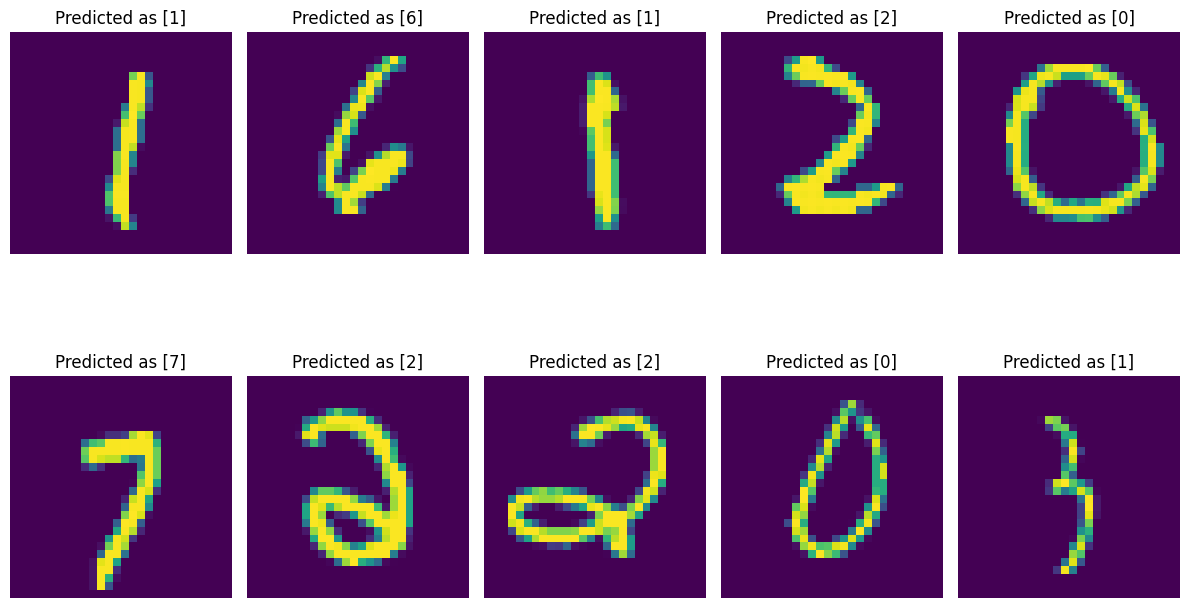

In [25]:
from sklearn.metrics import accuracy_score

y_pred = bestmodel.predict(X_test)
print(f"The accuracy score of the best model is {accuracy_score(y_test, y_pred)}\n")

plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    sample = random.choice(X_test)
    plt.imshow(sample.reshape(28,28))
    pred = bestmodel.predict(sample.reshape(1,-1))
    plt.title(f"Predicted as {pred}")
    plt.axis("off")

plt.tight_layout()

The accuracy of our model is around 93% and the 10 random samples from the test set are all predicted correctly, which is pretty nice. 


---
### Machine Learning Foundation (C) 2020 IBM Corporation
